In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [5]:
product_data = pd.read_excel('keis_7.xlsx', sheet_name='Product')
manufacturer_data = pd.read_excel('keis_7.xlsx', sheet_name='Manufacturer')
geo_data = pd.read_excel('keis_7.xlsx', sheet_name='Geo')
salesFact_data = pd.read_excel('keis_7.xlsx', sheet_name='SalesFact')

In [32]:
merged_data = pd.merge(salesFact_data, product_data, how='left', on='ProductID')

merged_data = pd.merge(merged_data, manufacturer_data, how='left', on='ManufacturerID')

merged_data = pd.merge(merged_data, geo_data, how='left', on='Zip')

print(merged_data.head())

   ProductID       Date    Zip  Units  Revenue Manufacturer_x Category  \
0        585 2010-09-30  42141      1  5039.37      VanArsdel    Urban   
1        585 2010-09-30  78753      1  5039.37      VanArsdel    Urban   
2        585 2010-09-30  21014      1  5039.37      VanArsdel    Urban   
3        585 2010-09-30  77905      1  5039.37      VanArsdel    Urban   
4        585 2010-09-30  27401      1  5039.37      VanArsdel    Urban   

       Segment        Product isVanArsdel IsCompeteHide  ManufacturerID  \
0  Convenience  Maximus UC-50         Yes             N               7   
1  Convenience  Maximus UC-50         Yes             N               7   
2  Convenience  Maximus UC-50         Yes             N               7   
3  Convenience  Maximus UC-50         Yes             N               7   
4  Convenience  Maximus UC-50         Yes             N               7   

  IsCompete Manufacturer_y MfgisVanArsdel            City State   Region  \
0        No      VanArsdel  

In [33]:
merged_data.drop(['City', 'District','Product', 'ManufacturerID', 'Manufacturer_x','IsCompete','ProductID', 'Zip','MfgisVanArsdel','isVanArsdel'], axis=1, inplace=True)
print(merged_data.head())

        Date  Units  Revenue Category      Segment IsCompeteHide  \
0 2010-09-30      1  5039.37    Urban  Convenience             N   
1 2010-09-30      1  5039.37    Urban  Convenience             N   
2 2010-09-30      1  5039.37    Urban  Convenience             N   
3 2010-09-30      1  5039.37    Urban  Convenience             N   
4 2010-09-30      1  5039.37    Urban  Convenience             N   

  Manufacturer_y State   Region  
0      VanArsdel    KY     East  
1      VanArsdel    TX  Central  
2      VanArsdel    MD     East  
3      VanArsdel    TX  Central  
4      VanArsdel    NC     East  


In [34]:
# Удаление дубликатов
merged_data = merged_data.drop_duplicates()
df=merged_data
# Преобразование строковой даты в объект datetime c разделением на год, месяц и день
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
merged_data['year'] = merged_data['Date'].dt.year
merged_data['month'] = merged_data['Date'].dt.month
merged_data['day'] = merged_data['Date'].dt.day
merged_data = merged_data.drop('Date', axis=1)



# Получение числовых и категориальных (кроме Manufacturer_y) признаков
numerical_columns = merged_data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = merged_data.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop('Manufacturer_y')

# Масштабирование числовых признаков
scaler = StandardScaler()
merged_data[numerical_columns] = scaler.fit_transform(merged_data[numerical_columns])

# Преобразование категориальных признаков с помощью one-hot encoding
merged_data = pd.get_dummies(merged_data, columns=categorical_columns, drop_first=True)

print(merged_data.head())

   Units   Revenue Manufacturer_y  year  month  day  Category_Rural  \
0    0.0 -0.401515      VanArsdel  2010      9   30           False   
1    0.0 -0.401515      VanArsdel  2010      9   30           False   
2    0.0 -0.401515      VanArsdel  2010      9   30           False   
4    0.0 -0.401515      VanArsdel  2010      9   30           False   
5    0.0 -0.401515      VanArsdel  2010      9   30           False   

   Category_Urban  Category_Youth  Segment_Convenience  ...  State_TX  \
0            True           False                 True  ...     False   
1            True           False                 True  ...      True   
2            True           False                 True  ...     False   
4            True           False                 True  ...     False   
5            True           False                 True  ...     False   

   State_UT  State_VA  State_VT  State_WA  State_WI  State_WV  State_WY  \
0     False     False     False     False     False     Fal

<ipython-input-34-d593f853f3e8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['Date'] = pd.to_datetime(merged_data['Date'])
<ipython-input-34-d593f853f3e8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['year'] = merged_data['Date'].dt.year
<ipython-input-34-d593f853f3e8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [35]:
df['Category'].value_counts()

,count
Category,
Urban,85596
Rural,26812
Youth,12886
Mix,10366


In [36]:
df['Manufacturer_y'].value_counts()

,count
Manufacturer_y,
VanArsdel,35992
Natura,23381
Aliqui,21180
Pirum,21056
Currus,7480
Quibus,5456
Abbas,4386
Pomum,3719
Victoria,3320


In [37]:
print(merged_data.columns)

Index(['Units', 'Revenue', 'Manufacturer_y', 'year', 'month', 'day',
       'Category_Rural', 'Category_Urban', 'Category_Youth',
       'Segment_Convenience', 'Segment_Extreme', 'Segment_Moderation',
       'Segment_Productivity', 'Segment_Regular', 'Segment_Select',
       'Segment_Youth', 'IsCompeteHide_Y', 'State_AL', 'State_AR', 'State_AZ',
       'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE', 'State_FL',
       'State_GA', 'State_IA', 'State_ID', 'State_IL', 'State_IN', 'State_KS',
       'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_MI', 'State_MN',
       'State_MO', 'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE',
       'State_NH', 'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH',
       'State_OK', 'State_OR', 'State_PA', 'State_RI', 'State_SC', 'State_SD',
       'State_TN', 'State_TX', 'State_UT', 'State_VA', 'State_VT', 'State_WA',
       'State_WI', 'State_WV', 'State_WY', 'Region_East', 'Region_West'],
      dtype='object')


In [38]:
# Выделение целевого признака (Manufacturer_y)
X = merged_data.drop('Manufacturer_y', axis=1)
y = merged_data['Manufacturer_y']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape
#y_train

(108528, 66)

In [39]:
# Задание списка моделей
from sklearn.ensemble import GradientBoostingClassifier
models = [LogisticRegression(max_iter=1000),RandomForestClassifier(n_estimators=100),KNeighborsClassifier(n_neighbors=15),GradientBoostingClassifier()]

# Словарь для сохранения результатов моделей
model_results = {'Model': [],'Accuracy': [],'Precision': [],'Recall': [],'F1 Score': []}

# Обучение моделей и вывод показателей качества
for model in models:
    # Обучение модели
    model.fit(X_train, y_train)
    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test.values) if model.__class__.__name__ == 'KNeighborsClassifier' else model.predict(X_test)

    # Сохранение результатов в словарь
    model_results['Model'].append(model.__class__.__name__)
    model_results['Accuracy'].append(accuracy_score(y_test, y_pred))
    model_results['Precision'].append(precision_score(y_test, y_pred, average='macro'))
    model_results['Recall'].append(recall_score(y_test, y_pred, average='macro'))
    model_results['F1 Score'].append(f1_score(y_test, y_pred, average='macro'))

    # Вывод покахзателей качества
    print(f"{model.__class__.__name__}: Общая точность: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Точность предсказания по классам: {precision_score(y_test, y_pred, average=None)}")
    print(f"Полнота предсказания по классам: {recall_score(y_test, y_pred, average=None)}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average=None)}\n")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LogisticRegression: Общая точность: 0.44
Точность предсказания по классам: [0.         0.27167399 0.         0.         0.         0.
 0.32943717 0.40570042 0.72727273 0.         0.         0.56940678
 0.        ]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Полнота предсказания по классам: [0.         0.16209774 0.         0.         0.         0.
 0.54913172 0.47683535 0.01098901 0.         0.         0.93696834
 0.        ]
F1 Score: [0.         0.20304569 0.         0.         0.         0.
 0.41181609 0.43840105 0.02165088 0.         0.         0.70834432
 0.        ]

RandomForestClassifier: Общая точность: 0.70
Точность предсказания по классам: [0.69661458 0.64590839 0.65730337 0.67774421 0.68391867 0.34146341
 0.65489533 0.67597765 0.68550725 0.76990185 0.65929204 0.76945146
 0.69838057]
Полнота предсказания по классам: [0.6422569  0.59833135 0.45614035 0.45107239 0.69943289 0.10200364
 0.65586616 0.74744595 0.64972527 0.6286732  0.37817259 0.93501604
 0.51186944]
F1 Score: [0.66833229 0.62121025 0.53855006 0.5416499  0.69158879 0.15708275
 0.65538038 0.70991764 0.66713681 0.69215686 0.48064516 0.84419263
 0.59075342]



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


KNeighborsClassifier: Общая точность: 0.49
Точность предсказания по классам: [0.46043165 0.31945496 0.24137931 0.32014388 0.45149254 0.
 0.3969795  0.47270335 0.46538462 0.4982699  0.4        0.59970967
 0.53023256]
Полнота предсказания по классам: [0.2304922  0.30178784 0.02729045 0.11930295 0.22873346 0.
 0.3896654  0.51223569 0.33241758 0.25645592 0.11167513 0.92176823
 0.33827893]
F1 Score: [0.3072     0.31037019 0.04903678 0.17382812 0.30363864 0.
 0.39328845 0.49167617 0.38782051 0.33862434 0.17460317 0.72665311
 0.41304348]

GradientBoostingClassifier: Общая точность: 0.77
Точность предсказания по классам: [0.78738318 0.72357526 0.87711864 0.78054299 0.94421488 0.78618421
 0.77864267 0.67766647 0.75312067 0.82821497 0.78244275 0.82343136
 0.915     ]
Полнота предсказания по классам: [0.80912365 0.70822408 0.80701754 0.46246649 0.86389414 0.43533698
 0.67789072 0.81967213 0.74587912 0.76847729 0.52030457 0.96444011
 0.54302671]
F1 Score: [0.79810539 0.71581737 0.84060914 0.580808

<ipython-input-40-9c8f540386ce>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=results_df, ci=None)


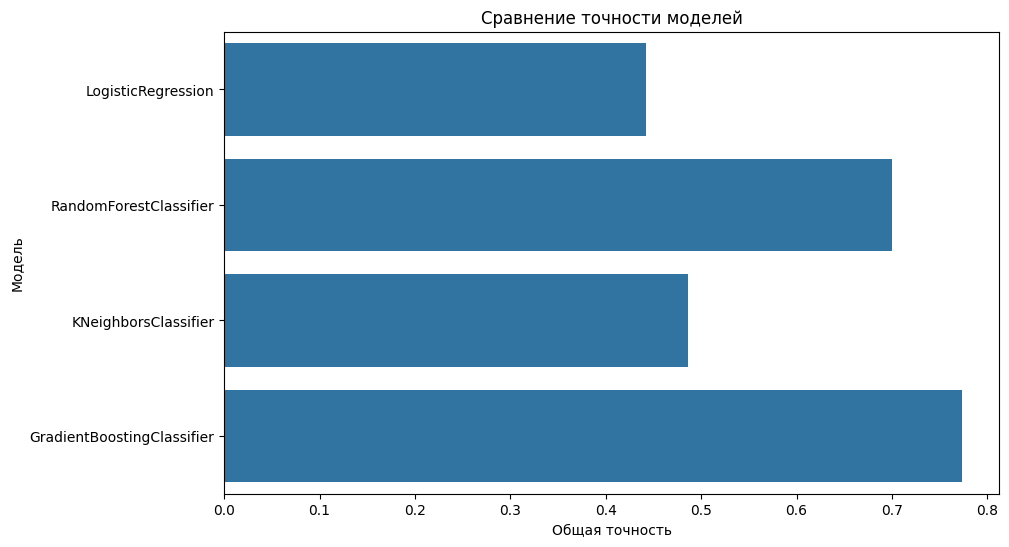

In [40]:
# Создание dataframe из результатов моделей
results_df = pd.DataFrame(model_results)

# Построение графика точности моделей
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df, ci=None)
plt.title('Сравнение точности моделей')
plt.xlabel('Общая точность')
plt.ylabel('Модель')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


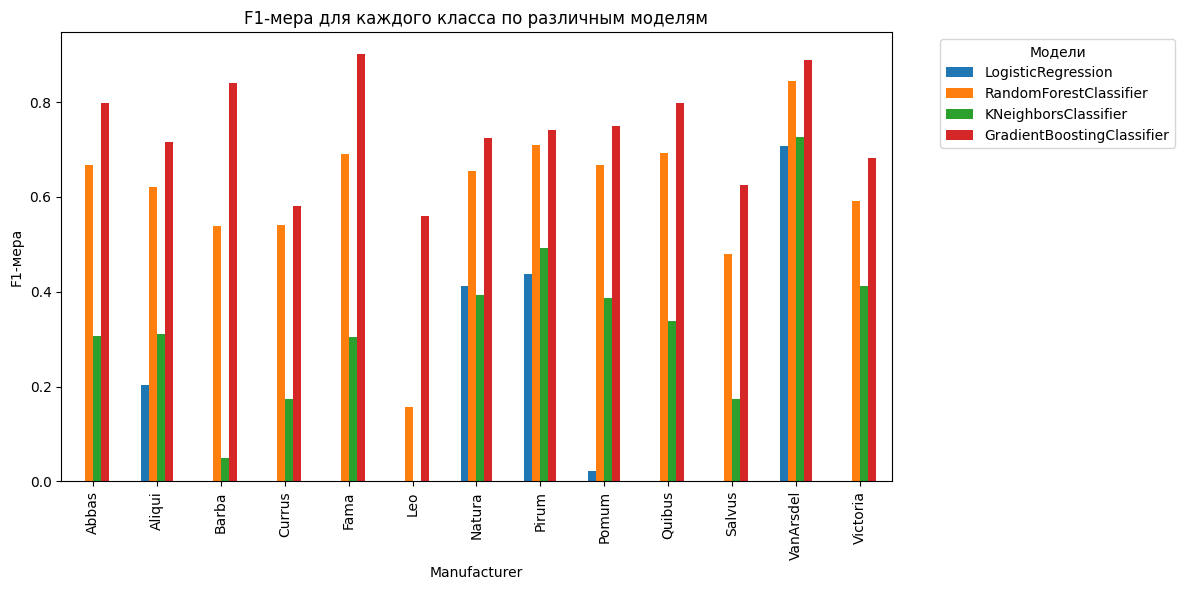

In [41]:
# Определение результатов f1-меры для каждой модели
f1_scores = [f1_score(y_test, model.predict(X_test.values), average=None) if model.__class__.__name__ == 'KNeighborsClassifier' else f1_score(y_test, model.predict(X_test), average=None) for model in models]
f1_df = pd.DataFrame(f1_scores, index=[model.__class__.__name__ for model in models]).T

# Определение классов Category
warehouse_code_labels = list(set(merged_data['Manufacturer_y'].values))
warehouse_code_labels.sort()
f1_df.index = warehouse_code_labels

# Построение графика f1-меры для каждого класса по каждой модели
f1_df.plot(kind='bar', figsize=(12, 6))
plt.title('F1-мера для каждого класса по различным моделям')
plt.xlabel('Manufacturer')
plt.ylabel('F1-мера')
plt.legend(title='Модели', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
#выгрузка результирующего csv-файла
merged_data.to_csv('кейс_7_1.csv',encoding='utf-8')

In [15]:
df.head()

,Date,Units,Revenue,Category,Segment,isVanArsdel,IsCompeteHide,Manufacturer_y,MfgisVanArsdel,State,Region,year,month,day
0,2010-09-30,1,5039.37,Urban,Convenience,Yes,N,VanArsdel,Yes,KY,East,2010,9,30
1,2010-09-30,1,5039.37,Urban,Convenience,Yes,N,VanArsdel,Yes,TX,Central,2010,9,30
2,2010-09-30,1,5039.37,Urban,Convenience,Yes,N,VanArsdel,Yes,MD,East,2010,9,30
4,2010-09-30,1,5039.37,Urban,Convenience,Yes,N,VanArsdel,Yes,NC,East,2010,9,30
5,2010-09-30,1,5039.37,Urban,Convenience,Yes,N,VanArsdel,Yes,IL,Central,2010,9,30


In [16]:
df['Unit_Price'] = df['Revenue'] / df['Units']
grouped_df = df.groupby(['Manufacturer_y', 'Region']).agg( AVG_Total=('Revenue', 'mean'), Quantity=('Units', 'sum'), AVG_U_Price=('Unit_Price', 'mean')).round(2)
grouped_df

AVG_Total  Quantity  AVG_U_Price
Manufacturer_y Region                                   
Abbas          Central    9389.67       969      9389.67
               East       9209.60      1768      9209.60
               West       8776.24      1649      8776.24
Aliqui         Central    4550.44      6319      4550.44
               East       4485.26      9794      4485.26
               West       4307.57      5067      4307.57
Barba          Central   14580.38       809     14580.38
               East      14164.52      1278     14164.52
               West      14556.33       423     14556.33
Currus         Central    4975.01      1858      4975.01
               East       5009.11      3794      5009.11
               West       4713.60      1828      4713.60
Fama           Central    9854.68       581      9854.68
               East       9592.49      1190      9592.49
               West       9845.11       904      9845.11
Leo            Central   11641.73       857     11641.73
               East      11366.57      1175     11366.57
               West      11564.32       540     11564.32
Natura         Central    4003.75      7426      4003.75
               East       4134.95     10579      4134.95
               West       3988.91      5376      3988.91
Pirum          Central    4837.30      6312      4837.30
               East       4879.79      9537      4879.79
               West       4556.16      5207      4556.16
Pomum          Central    4150.56       760      4150.56
               East       3727.22      1774      3727.22
               West       4303.48      1185      4303.48
Quibus         Central    4996.51      1339      4996.51
               East       5033.35      2006      5033.35
               West       5412.67      2111      5412.67
Salvus         Central    1606.97       546      1606.97
               East       1613.23      1048      1613.23
               West       1817.54       339      1817.54
VanArsdel      Central   11528.64     12792     11528.64
               East      11426.84     17032     11426.84
               West      10888.68      6168     10888.68
Victoria       Central    6723.37       841      6723.37
               East       6655.72      1464      6655.72
               West       6543.57      1015      6543.57

In [ ]:
# Сохраняем DataFrame в файл CSV
grouped_df.to_csv('сводная_1.csv', index=True)

In [17]:
print(df.dtypes)

Date              datetime64[ns]
Units                      int64
Revenue                  float64
Category                  object
Segment                   object
isVanArsdel               object
IsCompeteHide             object
Manufacturer_y            object
MfgisVanArsdel            object
State                     object
Region                    object
year                       int32
month                      int32
day                        int32
Unit_Price               float64
dtype: object


In [18]:
df.pivot_table(index='Manufacturer_y',columns='Region',values='Revenue',aggfunc='mean').round(2).style.highlight_max(color='lightblue')

Region,Central,East,West
Manufacturer_y,,,
Abbas,9389.670000,9209.600000,8776.240000
Aliqui,4550.440000,4485.260000,4307.570000
Barba,14580.380000,14164.520000,14556.330000
Currus,4975.010000,5009.110000,4713.600000
Fama,9854.680000,9592.490000,9845.110000
Leo,11641.730000,11366.570000,11564.320000
Natura,4003.750000,4134.950000,3988.910000
Pirum,4837.300000,4879.790000,4556.160000
Pomum,4150.560000,3727.220000,4303.480000


На примере 2.2, для понимания важности колонок

In [42]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Разделение данных на тренировочные и тестовые наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Кодирование категориальных данных
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Создание и обучение модели гистограммного градиентного бустинга
hgbr_model = HistGradientBoostingRegressor(max_iter=100, random_state=0)
hgbr_model.fit(X_train, y_train_encoded)


HistGradientBoostingRegressor(random_state=0)

In [43]:
pip install shap

In [44]:
import shap
explainer = shap.TreeExplainer(hgbr_model)
shap_values = explainer.shap_values(X_train)
feature_importance = np.mean(np.abs(shap_values), axis=0)
sorted_idxs = np.argsort(-feature_importance)
for idx in sorted_idxs:
    print(f"{X_train.columns[idx]}: {feature_importance[idx]:.3f}")

Revenue: 1.523
Category_Urban: 0.494
Segment_Convenience: 0.394
Segment_Productivity: 0.157
year: 0.127
Category_Youth: 0.118
Segment_Extreme: 0.101
Segment_Regular: 0.086
day: 0.071
Category_Rural: 0.066
month: 0.047
Segment_Moderation: 0.041
Segment_Select: 0.030
IsCompeteHide_Y: 0.030
State_TX: 0.018
State_CA: 0.004
State_FL: 0.004
State_MN: 0.004
State_CO: 0.003
Region_East: 0.003
State_RI: 0.002
State_VA: 0.002
Region_West: 0.001
State_MT: 0.001
State_MA: 0.001
State_IA: 0.000
State_LA: 0.000
State_WI: 0.000
State_AR: 0.000
State_TN: 0.000
State_UT: 0.000
State_NH: 0.000
State_NY: 0.000
State_OH: 0.000
Segment_Youth: 0.000
State_WA: 0.000
State_AL: 0.000
State_SD: 0.000
State_SC: 0.000
State_WV: 0.000
State_PA: 0.000
State_OR: 0.000
State_OK: 0.000
State_WY: 0.000
State_VT: 0.000
State_ID: 0.000
State_NV: 0.000
State_NM: 0.000
State_IL: 0.000
State_IN: 0.000
State_KS: 0.000
State_KY: 0.000
State_DE: 0.000
State_DC: 0.000
State_MD: 0.000
State_GA: 0.000
State_MI: 0.000
State_MO: 0.

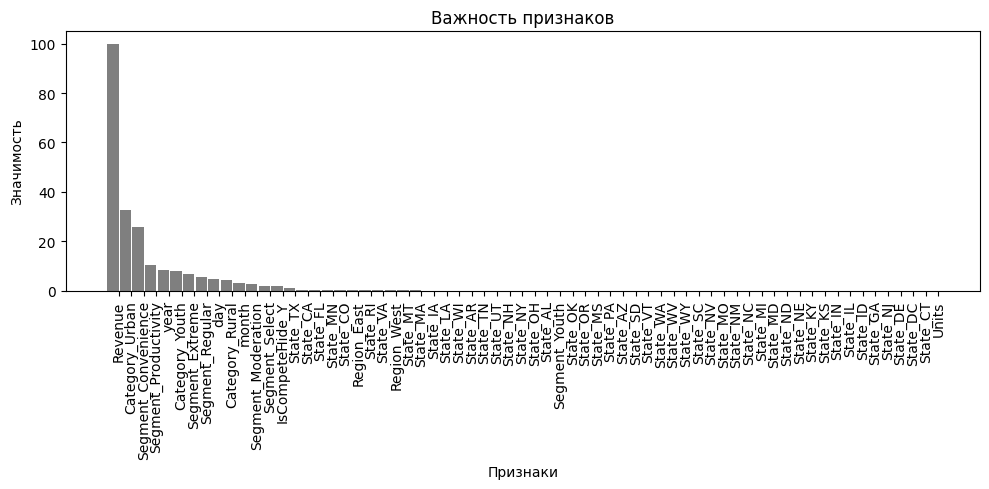

In [45]:
feat_names = X.columns
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1]
index = np.arange(len(feat_names))
bar_width = 0.9

plt.figure(figsize=(10, 5))
plt.bar(index, feature_importance[sorted_idx], width=bar_width, color='black', alpha=0.5)
plt.xlabel('Признаки')
plt.ylabel('Значимость')
plt.title('Важность признаков')
plt.xticks(index + bar_width / 2, np.array(feat_names)[sorted_idx], rotation='vertical')  # Смещаем метки
plt.tight_layout()
plt.show()